BIODATA SISWA DICODING

Nama : Maulana Galih Pratama

Email : maulanag10@gmail.com

Alamat : Tangerang

1. MENYIAPKAN LIBRARY

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os.path
import os
import zipfile

2. PANGGIL DATASET DARI WEB DICODING

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2021-04-14 08:35:59--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.13MB/s    in 4m 47s  

2021-04-14 08:40:48 (1.07 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
#karena split folders harus diinstall dahulu
!pip install split_folders

In [ ]:
import splitfolders

splitfolders.ratio(
    '/tmp/rockpaperscissors/rps-cv-images',
    output='/tmp/rockpaperscissors/output',
    seed=1337,
    ratio=(.6, .4)
)

Copying files: 2188 files [00:00, 4171.09 files/s]


In [ ]:
os.listdir('/tmp/rockpaperscissors/output/train')

['paper', 'scissors', 'rock']

In [ ]:
base_dir = '/tmp/rockpaperscissors/output'
train_dir = os.path.join(base_dir, 'train')
train_paper = os.path.join(train_dir, 'paper')
train_rock = os.path.join(train_dir, 'rock')
train_scissors = os.path.join(train_dir, 'scissors')

validation_dir = os.path.join(base_dir, 'val')
val_paper = os.path.join(validation_dir, 'paper')
val_rock = os.path.join(validation_dir, 'rock')
val_scissors = os.path.join(validation_dir, 'scissors')

3. AUGMENTASI GAMBAR

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode = 'nearest',
    validation_split=0.5
)

In [ ]:
#data training
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse'
)

#data validation
validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


4. MEMBUAT ARSITEKTUR CNN

In [ ]:
model = tf.keras.models.Sequential([                 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(4,4),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),


    tf.keras.layers.Dense(3, activation='softmax')
])

# compile model dengan 'rmsprop' optimizer loss function 'sparse_categorical_crossentropy' 
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 256)       147712    
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 128)       295040    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 128)        

5. MELATIH DATA

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
 def on_epoch_end(self, epoch, logs={}):
   if((logs.get('accuracy') > 0.91) and (logs.get('val_accuracy') > 0.91)):
     print("\n Accuracy and val_accuracy have reached 91%, the training process is stopped!")
     self.model.stop_training = True

callbacks = myCallback()

In [ ]:
training_process = model.fit(
    train_generator,
    batch_size=32,
    steps_per_epoch=5,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=10,
    verbose=2,
    callbacks=[callbacks]
)

Epoch 1/25
5/5 - 24s - loss: 0.4996 - accuracy: 0.7937 - val_loss: 0.4034 - val_accuracy: 0.8438
Epoch 2/25
5/5 - 24s - loss: 0.3118 - accuracy: 0.9062 - val_loss: 0.2815 - val_accuracy: 0.8938
Epoch 3/25
5/5 - 24s - loss: 0.3913 - accuracy: 0.8438 - val_loss: 0.6657 - val_accuracy: 0.7219
Epoch 4/25
5/5 - 24s - loss: 0.5287 - accuracy: 0.8125 - val_loss: 0.2484 - val_accuracy: 0.9312
Epoch 5/25
5/5 - 24s - loss: 0.2439 - accuracy: 0.9062 - val_loss: 0.4083 - val_accuracy: 0.8281
Epoch 6/25
5/5 - 24s - loss: 0.5509 - accuracy: 0.8125 - val_loss: 0.4075 - val_accuracy: 0.8031
Epoch 7/25
5/5 - 24s - loss: 0.4149 - accuracy: 0.8375 - val_loss: 0.2817 - val_accuracy: 0.9000
Epoch 8/25
5/5 - 24s - loss: 0.3549 - accuracy: 0.8625 - val_loss: 0.3199 - val_accuracy: 0.8875
Epoch 9/25
5/5 - 24s - loss: 0.2591 - accuracy: 0.9250 - val_loss: 0.4523 - val_accuracy: 0.8250
Epoch 10/25
5/5 - 24s - loss: 0.3828 - accuracy: 0.8813 - val_loss: 0.3814 - val_accuracy: 0.8344
Epoch 11/25
5/5 - 24s - loss:

In [ ]:
#menguji model
model.evaluate(train_generator)

41/41 [==============================] - 39s 941ms/step - loss: 0.2318 - accuracy: 0.9230


[0.2318199723958969, 0.9230182766914368]

6. TESTING MODEL

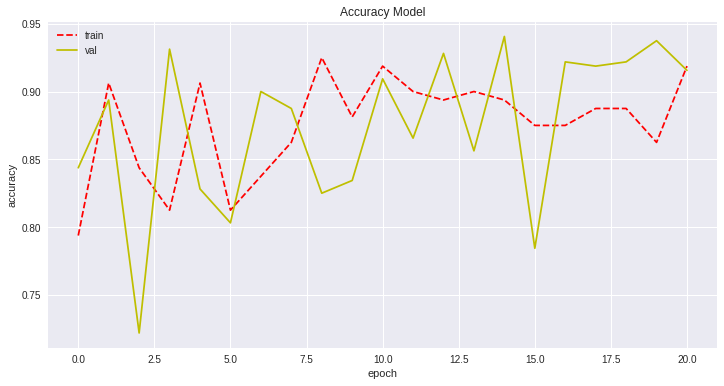

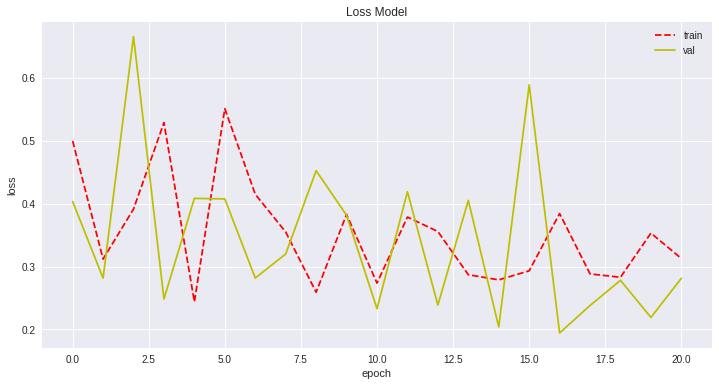

In [ ]:
# history visualization accuracy model  
plt.style.use('seaborn')
plt.figure(figsize=(12,6))
plt.plot(training_process.history['accuracy'], linestyle='--', color='r')
plt.plot(training_process.history['val_accuracy'], color='y')
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

# history visualization loss model
plt.figure(figsize=(12,6))
plt.plot(training_process.history['loss'],linestyle='--', color='r')
plt.plot(training_process.history['val_loss'], color='y')
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

Saving gunting.png to gunting.png
gunting.png is :  SCISSORS image


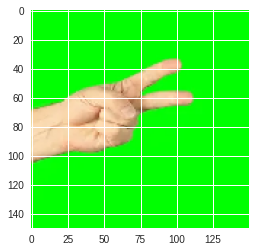

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  predictions = model.predict(images, batch_size=32)
  max_index = np.argmax(predictions[-1])
  classes = ('PAPER', 'ROCK', 'SCISSORS')
  prediction = classes[max_index]

  print(fn, "is : ", prediction, "image")